In [4]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt

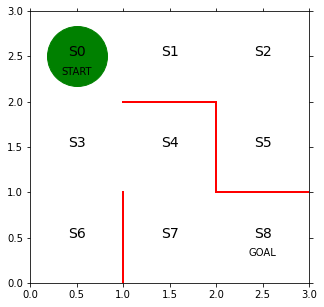

In [5]:
# 初期位置での迷路の様子b

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1,1],[0,1],color='red',linewidth=2)
plt.plot([1,2],[2,2],color='red',linewidth=2)
plt.plot([2,2],[2,1],color='red',linewidth=2)
plt.plot([2,3],[1,1],color='red',linewidth=2)

# 状態を示す文字50~58を描く
plt.text(0.5, 2.5, 'S0',size=14,ha='center')
plt.text(1.5, 2.5, 'S1',size=14,ha='center')
plt.text(2.5, 2.5, 'S2',size=14,ha='center')
plt.text(0.5, 1.5, 'S3',size=14,ha='center')
plt.text(1.5, 1.5, 'S4',size=14,ha='center')
plt.text(2.5, 1.5, 'S5',size=14,ha='center')
plt.text(0.5, 0.5, 'S6',size=14,ha='center')
plt.text(1.5, 0.5, 'S7',size=14,ha='center')
plt.text(2.5, 0.5, 'S8',size=14,ha='center')
plt.text(0.5, 2.3, 'START',ha='center')
plt.text(2.5, 0.3, 'GOAL',ha='center')

# 描画画面の設定とメモリを消す設定
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both',which='both',bottom='off',top='off',
labelbottom='off',right='off',left='off',labelleft='off')

# 現在地S0に緑丸を描画
line, = ax.plot([0.5], [2.5], marker="o",color='g',markersize=60)
# plt.show()

In [6]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0~7、列は移動方向で、上、右、下、左を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan], # S0
                    [np.nan, 1, np.nan, 1], # S1
                    [np.nan, np.nan, 1, 1], # S2
                    [1, 1, 1, np.nan], # S3
                    [np.nan, np.nan, 1, 1], # S4
                    [1, np.nan, np.nan, np.nan], # S5
                    [1, np.nan, np.nan, np.nan], # S6
                    [1, 1, np.nan, np.nan], # S7
                    ])


In [7]:
# 方策パラメータthetaを行動方策piにソフトマックス関数で変換する手法の定義

def softmax_convert_into_pi_from_theta(theta):
    '''ソフトマックス関数で割合を計算する'''
    
    beta = 1.0
    [m,n] = theta.shape # thetaの行列サイズを取得
    pi = np.zeros((m,n))
    
    exp_theta = np.exp(beta*theta) # thetaをexp(theta)へと変換
    
    for i in range(0, m):
        pi[i,:] = exp_theta[i,:]/np.nansum(exp_theta[i,:])
        
    pi = np.nan_to_num(pi) # nanを0に変換
    
    return pi

In [8]:
# 初期の方策pi_0を求める
pi_0 =softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [9]:
# 1step移動後の状態sを求める関数を定義

def get_action_and_next_s(pi, s):
    direction = ["up","right","down","left"]

    next_direction = np.random.choice(direction, p=pi[s, :])
    # pi[s,:]の確立に従って、directionが選択される

    if next_direction == "up":
        action = 0
        s_next = s-3 # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        action=1
        s_next = s+1 # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        action=2
        s_next = s+3 # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        action = 3
        s_next = s-1 #左に移動するときは状態の数字が１小さくなる

    return [action, s_next]

In [10]:
# 迷路内をエージェントがゴールするまで移動させる関数の定義
def goal_maze_ret_s_a(pi):
    s=0 # スタート地点
    s_a_history = [[0, np.nan]] #エージェントの移動を記録するリスト

    while(1): # ゴールするまでループする
        [action, next_s] = get_action_and_next_s(pi,s)
        s_a_history[-1][1] = action
        # 現在の状態（つまり一番最後なのでindex=-1)の行動を代入
        
        s_a_history.append([next_s, np.nan])
        # 次の状態を代入。行動はまだわからないのでnanにしておく
        
        if next_s == 8: #ゴール地点なら終了
            break
        else:
            s = next_s

    return s_a_history

In [11]:
# 初期の方策で迷路を解く
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print(len(s_a_history)-1)

[[0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 3], [0, 2], [3, 0], [0, 2], [3, 2], [6, 0], [3, 0], [0, 2], [3, 1], [4, 3], [3, 2], [6, 0], [3, 1], [4, 2], [7, 0], [4, 3], [3, 1], [4, 3], [3, 0], [0, 2], [3, 1], [4, 2], [7, 0], [4, 2], [7, 1], [8, nan]]
40


In [14]:
# thetaの更新関数を定義します

def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 学習係数、学習率
    T = len(s_a_history)
    
    [m,n] = theta.shape # thetaの行列サイズを取得
    delta_theta = theta.copy() # Δthetaの元を作成、ポインタ参照なので、delta_theta=thetaではダメ
    
    # delta_thetaを要素ごとに求める
    for i in range(0,m):
        for j in range(0,n):
            if not (np.isnan(theta[i, j])): # thetaがnanでない場合
                
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 履歴から状態iのものを取り出すリスト内包表記
                
                SA_ij = [SA for SA in s_a_history if SA == [i,j]]
                # 状態iで行動jをしたものを取り出す
                
                N_i = len(SA_i) #状態iで行動した総回数
                N_ij = len(SA_ij) # 状態iで行動jをとった回数
                delta_theta[i,j] = (N_ij + pi[i,j]*N_i)/T
                
    new_theta = theta + eta*delta_theta
    
    return new_theta

In [15]:
# 方策の更新
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.5        0.5        0.        ]
 [0.         0.49878049 0.         0.50121951]
 [0.         0.         0.5        0.5       ]
 [0.33333267 0.33414667 0.33252066 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.50060976 0.49939024 0.         0.        ]]


In [20]:
# 方策勾配法で迷路を解く

stop_epsilon = 10**-8 # 10^-8よりも方策に変化が小さくなったら学習終了とする

theta = theta_0
pi = pi_0

is_continue = True
count = 1

while is_continue: #is_continueがFalseになるまで繰り返す
    s_a_history = goal_maze_ret_s_a(pi) #方策πで迷路内を探索した履歴を求める
    new_theta = update_theta(theta,pi,s_a_history) # パラメータΘを更新
    new_pi = softmax_convert_into_pi_from_theta(new_theta) # 方策πの更新
    
    print(np.sum(np.abs(new_pi - pi))) # 方策の変化を出力
    print(len(s_a_history)-1)
    
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.030345550465145865
12
0.02042059417435632
14
0.014486269169913524
16
0.01591799429324464
66
0.027992093222638292
6
0.006651060752437765
40
0.012188886251079445
54
0.01244822251748412
50
0.012542274611305748
90
0.010385040796180134
48
0.02811925986260544
6
0.013393822244280595
96
0.009864108311754105
48
0.017493276919866352
16
0.009293083806206415
30
0.015449996398459453
12
0.01083700630341805
60
0.0135769546851216
14
0.014437736985026539
48
0.01845735287350031
30
0.009848821589138246
54
0.017990748253115585
48
0.012889989024705395
42
0.007094441718576983
44
0.015403540334065269
24
0.01593091534078095
26
0.010178081312506304
42
0.01510470964563565
46
0.00902620413953753
44
0.018370828432965558
28
0.01982157269074525
44
0.006537300826175485
68
0.011058639911087298
46
0.013849796090707134
14
0.014421783133101274
26
0.012399059127011669
60
0.008645954723862925
50
0.010194630890413225
50
0.01921898979125114
10
0.01085630648715924
22
0.005147495170367389
34
0.022935357954077806
8
0.0248209

4
1.0100391089154666e-05
4
9.704420237148667e-06
4
9.323970155198844e-06
4
8.958432685345558e-06
4
8.607223484164438e-06
4
8.269781090947074e-06
4
7.945566030585495e-06
4
7.63405995889613e-06
4
7.3347648299401116e-06
4
7.0472021064512744e-06
4
6.770911994646922e-06
4
6.505452710591138e-06
4
6.250399775755482e-06
4
6.0053453408852744e-06
4
5.769897532864258e-06
4
5.5436798323879424e-06
4
5.326330470294297e-06
4
5.117501849957672e-06
4
4.916859996288848e-06
4
4.724084018577508e-06
4
4.538865598522867e-06
4
4.360908500270271e-06
4
4.189928094959092e-06
4
4.025650907731399e-06
4
3.8678141799591135e-06
4
3.7161654500045756e-06
4
3.5704621490745073e-06
4
3.430471216508496e-06
4
3.295968723425397e-06
4
3.1667395173102946e-06
4
3.042576878375862e-06
4
2.923282188978595e-06
4
2.808664614384217e-06
4
2.6985408010690795e-06
4
2.5927345808791277e-06
4
2.491076693026001e-06
4
2.3934045054884657e-06
4
2.2995617682438584e-06
4
2.209398349162042e-06
4
2.1227700053207474e-06
4
2.0395381450303406e-06
4


In [21]:
# 最終的な方策を確認
np.set_printoptions(precision=3,suppress=True) # 有効桁数4,指数表示しないという設定
print(pi)

[[0.    0.    1.    0.   ]
 [0.    0.467 0.    0.533]
 [0.    0.    0.467 0.533]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]]


In [23]:
# エージェント移動の様子の可視化
from matplotlib import animation
from IPython.display import HTML

def init():
    '''背景画像の初期化'''
    line.set_data([], [])
    return(line,)

def animate(i):
    '''フレームごとの描画内容'''
    state = s_a_history[i][0] #現在の場所を描く
    x = (state % 3) + 0.5 # 状態のx座標は、3で割ったあまり+0.5
    y = 2.5 - int(state/3) # y座標は3で割った商を2.5から引く
    line.set_data(x,y)
    return(line,)

# 初期化関数とフレームごとの描画関数を用いて動画を作成する
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(s_a_history), interval=200,repeat=False)

HTML(anim.to_jshtml())